In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))

# Example usage

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Import, and set to log to the console.  (See the console which is running
# Jupyter notebook for logging about HTTP requests.)
import tilemapbase
tilemapbase.start_logging()

In [4]:
# Don't need if you have run before; DB file will already exist.
tilemapbase.init(create=True)

In [5]:
# Use open street map
t = tilemapbase.tiles.OSM

In [6]:
# My current office at the University of Leeds
my_office = (-1.554934, 53.804198)

degree_range = 0.003
extent = tilemapbase.Extent.from_lonlat(my_office[0] - degree_range, my_office[0] + degree_range,
                  my_office[1] - degree_range, my_office[1] + degree_range)
extent = extent.to_aspect(1.0)
extent

Extent((0.4956724055555556,0.3219964662575393)->(0.49568907222222225,0.32201313292420597) projected as normal)

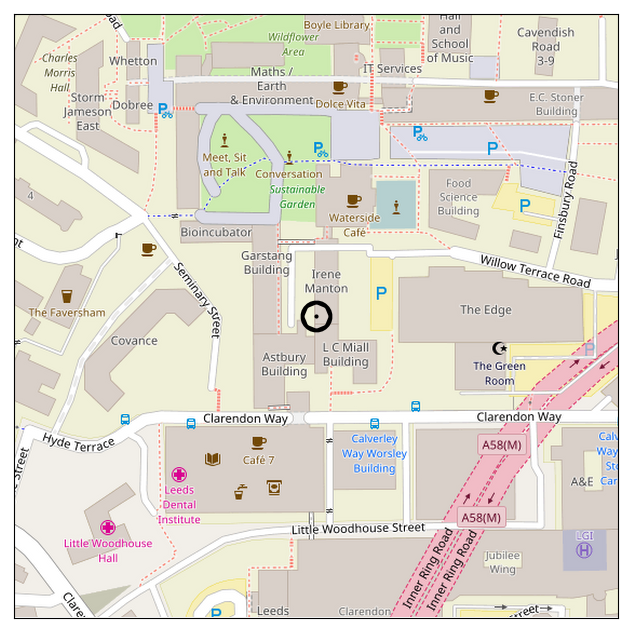

In [7]:
# On my desktop, DPI gets scaled by 0.75
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

This plotting method uses PIL to assemble each tile into one big image, and then displays this using `matplotlib`.

If instead we place each tile in the plot using `imshow`, then we get distortion.  If you look closely at e.g. the "Maths / Earth & Environment" text, you'll this.

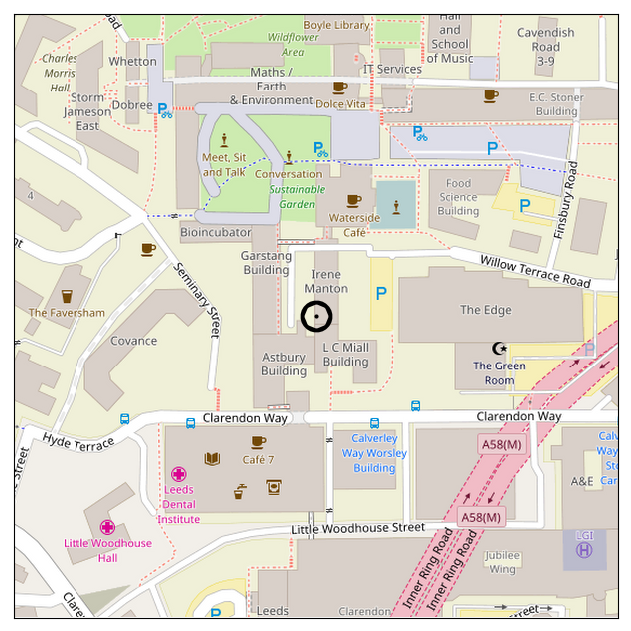

In [8]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter.plotlq(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

When producing figures for printing, a higher resolutions might be appropriate.  This can be achieved by increasing the zoom level.  The figure could be saved as:

    fig.savefig("test.pdf", dpi=200)
    
This will transparently create a high-DPI PDF file.  (It is worth also saving a copy without the `dpi=200` and comparing the outputs.)

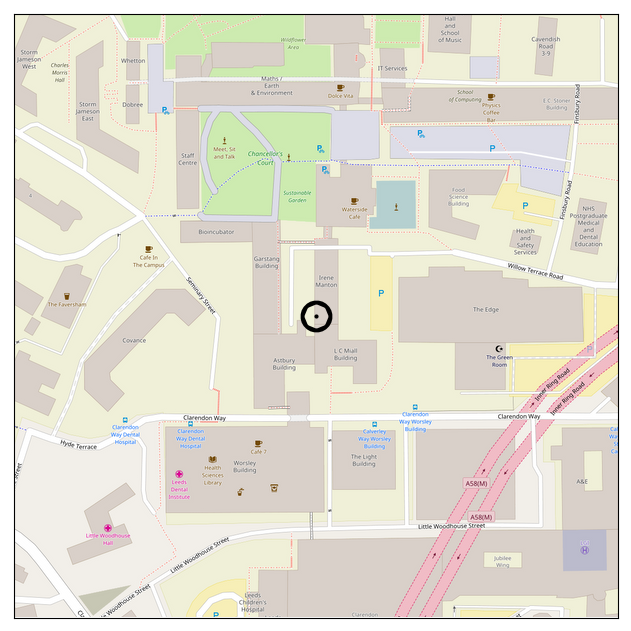

In [9]:
plotter1 = tilemapbase.Plotter(plotter.extent, t, zoom = plotter.zoom + 1)
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plotter1.plot(ax, t)

x, y = tilemapbase.project(*my_office)
ax.scatter(x,y, marker=".", color="black", linewidth=20)
None

We can translate a given extent object.

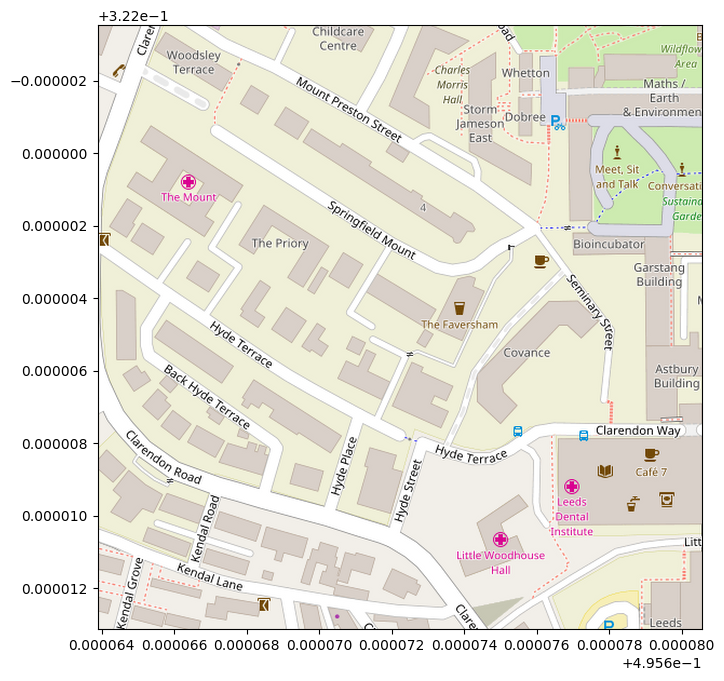

In [10]:
extent1 = extent.with_centre_lonlat(-1.558, 53.804198)
plotter2 = tilemapbase.Plotter(extent1, t, width=600)

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
plotter2.plot(ax)

It can be convenient to use [EPSG:3857](http://spatialreference.org/ref/sr-org/6864/) as other GIS systems will support this (e.g. GeoPandas), while "web mercator" is not a recognised standard.

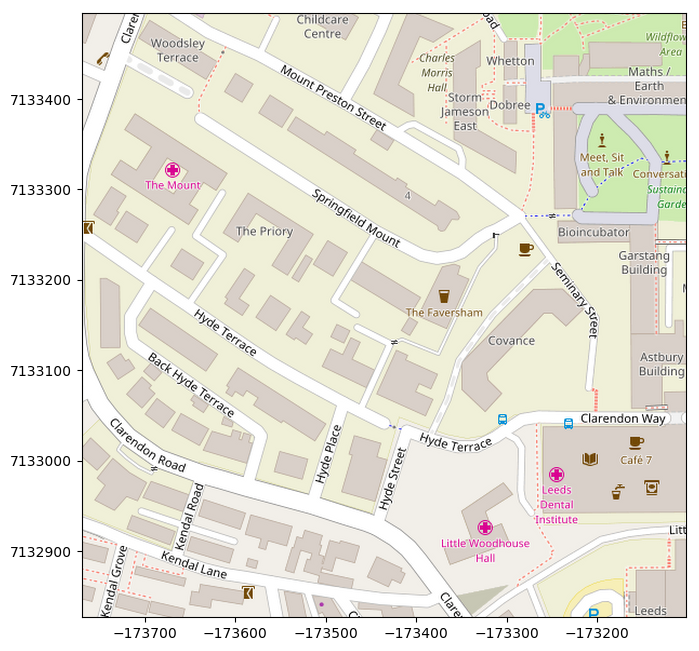

In [11]:
extent2 = extent1.to_project_3857()
plotter3 = tilemapbase.Plotter(extent2, t, width=600)

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
plotter3.plot(ax)